In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy.sparse as spa
import cvxpy as cp
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [2]:
full_data = pd.read_csv("yellow_tripdata_2010-01.csv")
full_data['pickup_datetime'] = pd.to_datetime(full_data['pickup_datetime'])
full_data['dropoff_datetime'] = pd.to_datetime(full_data['dropoff_datetime'])

year = 2010
month = 1
day = 21
date = datetime.date(year, month, day)

day_data = full_data.loc[(full_data['pickup_datetime'].dt.date == date) & (full_data['dropoff_datetime'].dt.date == date)]
day_data = day_data[['pickup_datetime', 'dropoff_datetime', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']]
day_data = day_data.loc[(day_data['pickup_longitude'] != 0) & (day_data['pickup_latitude'] != 0)]

n = 500
data = day_data.sample(n).sort_values(by = 'pickup_datetime')
data.index = range(n)
data

C:\Users\holly\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pickup_datetime,dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2010-01-21 00:02:49,2010-01-21 00:25:20,5.70,-73.987135,40.764051,-73.912336,40.774793,16.5,0.5,0.5,1.00,0.0,18.50
1,2010-01-21 00:03:52,2010-01-21 00:07:48,1.00,-73.984951,40.756181,-73.977084,40.764407,4.9,0.5,0.5,0.00,0.0,5.90
2,2010-01-21 00:04:00,2010-01-21 00:10:00,1.25,-73.985748,40.732808,-73.980025,40.743133,5.7,0.5,0.5,0.00,0.0,6.70
3,2010-01-21 00:05:26,2010-01-21 00:15:28,3.40,-73.959550,40.770998,-73.980846,40.729934,10.1,0.5,0.5,0.00,0.0,11.10
4,2010-01-21 00:06:00,2010-01-21 00:24:00,5.16,-73.994155,40.751188,-73.938130,40.793023,14.5,0.5,0.5,0.00,0.0,15.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2010-01-21 23:42:38,2010-01-21 23:49:13,2.20,-73.976297,40.785841,-73.997658,40.761575,7.3,0.5,0.5,2.07,0.0,10.37
496,2010-01-21 23:43:00,2010-01-21 23:51:00,2.00,-73.994253,40.740627,-73.980242,40.762782,6.9,0.5,0.5,1.00,0.0,8.90
497,2010-01-21 23:44:00,2010-01-21 23:53:00,1.54,-73.984865,40.732372,-74.004375,40.730647,6.9,0.5,0.5,2.00,0.0,9.90
498,2010-01-21 23:46:00,2010-01-21 23:59:00,5.49,-74.001662,40.735690,-73.975763,40.666665,14.5,0.5,0.5,0.00,0.0,15.50


## Vector Formulation

In [3]:
import class_TP
from class_TP import TP

In [4]:
def to_td(minutes):
    td = []
    for m in minutes:
        td.append(datetime.timedelta(minutes = m))
    return td

Using license file C:\Users\holly\gurobi.lic
Academic license - for non-commercial use only


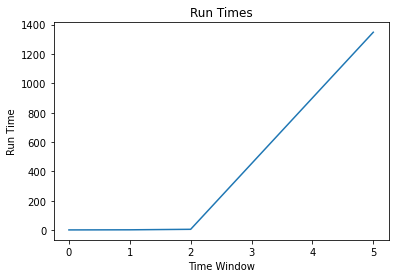

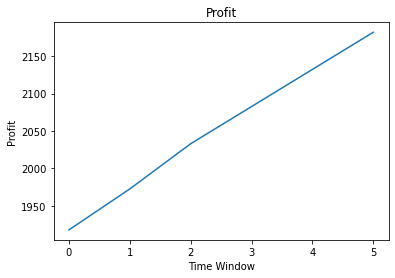

In [5]:
window_mins = [0, 1, 2, 5]
time_windows = to_td(window_mins)
run_times = []
objectives = []

for time_window in time_windows:
    
    tp = TP(data)
    x, problem = tp.problem(time_window)
    
    sims = 10
    run_time = 0
    for i in range(sims):
        problem.solve()
        run_time += problem.solver_stats.solve_time
    run_times.append(run_time/sims)
    objectives.append(problem.objective.value)
#     print("Time Window:", time_window)
#     print("Run Time:", run_time/sims)
#     print("Objective Value:", problem.objective.value)
    
#     x_val = spa.dok_matrix((tp.num_nodes, tp.num_nodes))
#     for a in range(tp.num_arcs):
#         x_val[tp.arcs[a]] = x[a].value
#     print(x_val.tocoo())

plt.figure(1)
plt.plot(window_mins, run_times);
plt.title("Run Times");
plt.xlabel("Time Window");
plt.ylabel("Run Time");
plt.figure(2)
plt.plot(window_mins, objectives);
plt.title("Profit");
plt.xlabel("Time Window");
plt.ylabel("Profit");

In [6]:
run_times

[2.0229373931884767, 2.7513507843017577, 6.170738410949707, 1348.1475374221802]

## Map
Needs updating

In [ ]:
x_val = spa.dok_matrix((n+taxis+2, n+taxis+2))
for i in range(n+taxis+2):
    for j in s_list[i]:
        x_val[i,j] = x[arcs.get((i,j))].value
print("Time Window:", time_window)
print(x_val.tocoo())
print(objective.value)

In [ ]:
arcs = np.asarray(np.nonzero(x_val))
# locs = np.unique(arcs[arcs < 200])
# lons = data.iloc[locs, 3]
# lats = data.iloc[locs, 4]

loc_origin = arcs[0][:-taxis-2]
loc_destin = arcs[1][:-taxis-2]

lon_origin = data.iloc[loc_origin, 3].to_numpy()
lat_origin = data.iloc[loc_origin, 4].to_numpy()
lon_destin = data.iloc[loc_destin, 3].to_numpy()
lat_destin = data.iloc[loc_destin, 4].to_numpy()

In [ ]:
# from shapely.geometry import Point, LineString
from matplotlib.patches import FancyArrowPatch

nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
# nyc = nyc.to_crs(epsg=3857)
nyc = nyc.to_crs(epsg=4326)
ax = nyc.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

ax.set_xlim(-74.05, -73.85)
ax.set_ylim(40.68, 40.82)

# nodes = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lons, lats))
# nodes.plot(color='green')

fig = plt.figure()

# One Taxi's Journey
taxi_num = n + 1
node = arcs[1][np.where(arcs[0] == taxi_num)] # First node (rider) for given taxi
while True:
    where = np.array(np.where(loc_origin == node))
    if (where.size == 0): break
    i = where[0][0]
    dx = lon_destin[i] - lon_origin[i]
    dy = lat_destin[i] - lat_origin[i]
    ax.arrow(lon_origin[i], lat_origin[i], dx, dy, color = 'pink', width=.0004)
    node = loc_destin[i]

plt.show()